In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms
import torchvision.datasets as datasets

IMG_DIR = '/home/cm/DigiPath/consROI'
NUM_CLASSES = 4

In [38]:
# ### load the pretrained model
# model = torchvision.models.alexnet(pretrained=True)

# ### make all layers non-trainable
# for idx, param in enumerate(model.parameters()):
#     if idx < len(list(model.parameters())):
#         param.requires_grad = False
        
# module_name = str(len(model.classifier))
# out_features = model.classifier[-1].out_features
# model.classifier.add_module(module_name, torch.nn.Linear(out_features, NUM_CLASSES))

# for child in model.children():
#     print(child)

In [39]:
### load the pretrained model
model = torchvision.models.alexnet(pretrained=True)

### make only the last layer trainable
for idx, param in enumerate(model.parameters()):
    if idx < len(list(model.parameters()))-2:
        param.requires_grad = False
        
### change the last layer's output size as the number of classes        
model.classifier[-1].out_features = NUM_CLASSES

for child in model.children():
    print(child)


Sequential(
  (0): Conv2d (3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace)
  (2): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1))
  (3): Conv2d (64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace)
  (5): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1))
  (6): Conv2d (192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace)
  (8): Conv2d (384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace)
  (10): Conv2d (256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1))
)
Sequential(
  (0): Dropout(p=0.5)
  (1): Linear(in_features=9216, out_features=4096)
  (2): ReLU(inplace)
  (3): Dropout(p=0.5)
  (4): Linear(in_features=4096, out_features=4096)
  (5): ReLU(inplace)
  (6): Linear(in_features=4096, out_features=4)
)


### prepare the data

In [48]:
global MEAN_GLOBAL
global STD_GLOBAL
MEAN_GLOBAL = [0.485, 0.456, 0.406] # mean for alexnet images
STD_GLOBAL  = [0.229, 0.224, 0.225] # standard deviation for alexnet images

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(30),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(MEAN_GLOBAL, STD_GLOBAL)
    ])}
#data_transforms = {
    #'val': transforms.Compose([
    #    transforms.Resize(256),
    #    transforms.CenterCrop(224),
    #    transforms.ToTensor(),
    #    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    #]),
#}

In [49]:
image_datasets = {x: datasets.ImageFolder(os.path.join(IMG_DIR, x),
                                          data_transforms[x]) for x in ['train']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=8,
                                              shuffle=True, num_workers=4)  
                                              for x in ['train']}
class_names = image_datasets['train'].classes
print(class_names)

['Atypical', 'DCIS', 'Invasive', 'UDH']


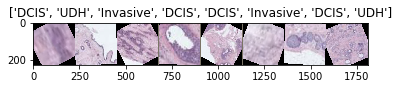

In [50]:
def timshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array(MEAN_GLOBAL)
    std = np.array(STD_GLOBAL)
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
timshow(out, title=[class_names[x] for x in classes])